In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### &#11088; Visualisierung der Daten

### &#11088; Funktionen für die Visualisierung und Plotting

In [172]:
def Datensatz(CSVdatei):
    data = pd.read_csv(CSVdatei, delimiter= ";")
    return data
    

**Ringe** 

Die Funktion Ringe macht es, dass ein Datensatz eingelesen wird und dann ein Pie Chart ausgibt, welcher anzeigt welcher Ring am öftesten getroffen wurde.

In [173]:
def Ringe(Datensatz):
    try:
        Ring= Datensatz["Ringe"].value_counts()
    except: 
        print ("Dataframe ist kein Arrow Dataframe oder hat keine Spalte namens 'Ringe'")
    return Ring.plot.pie(figsize= (3,3), ylabel = "Treffer", xlabel = "",legend= True)

**Zielscheibe**

Die Funktion Zielscheibe macht es, dass ein Datensatz eingelesen wird und dann ein Scatterplot erstellt wird. 
Das besondere an der Funktion ist, dass der Plot auch anzeigt wo genau der Pfeil, in der Zielscheibe getroffen hat.

In [174]:
def Zielscheibe (Datensatz):
        if Datensatz["Typ Auflage"].max() == 122:

            Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)
            
            c11 = plt.Circle((0,0), 61, alpha = 0.5, color = 'yellow', zorder = 5)         # 10 Punkte
            c12 = plt.Circle((0,0), 118, alpha = 0.7, color = 'yellow', zorder = 4)        # 9 Punkte
            c13 = plt.Circle((0,0), 162, alpha = 0.3, color = 'red', zorder = 3)           # 8 Punkte
            c14 = plt.Circle((0,0), 217, alpha = 0.6, color = 'red', zorder = 2)           # 7 Punkte
            c15 = plt.Circle((0,0), 268, alpha = 1.0, color = 'lightblue', zorder = 1)     # 6 Punkte

            for l in [c11, c12, c13, c14, c15]:
                Plot.add_patch(l)
        
        elif Datensatz["Typ Auflage"].max() == 40:

            Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140), zorder = 8) 

            c31 = plt.Circle((0,0), 21, alpha = 0.5, color = 'yellow', zorder = 7)     # 10 Punkte       
            c32 = plt.Circle((0,0), 41, alpha = 0.7, color = 'yellow', zorder = 6)     # 9 Punkte
            c33 = plt.Circle((0,0), 59, alpha = 0.3, color = 'red', zorder = 5)        # 8 Punkte
            c34 = plt.Circle((0,0), 73, alpha = 0.6, color = 'red', zorder = 4)        # 7 Punkte
            c35 = plt.Circle((0,0), 91, alpha = 1.0, color = 'lightblue', zorder = 3)  # 6 Punkte
            c36 = plt.Circle((0,0), 118, alpha = 0.9, color = 'lightblue', zorder = 2) # 5 Punkte
            c37 = plt.Circle((0,0), 137, alpha = 0.8, color = 'black', zorder = 1)     # 4 Punkte

            for l in [c31, c32, c33, c34, c35, c36, c37]:
                Plot.add_patch(l)
        
        else: print ("Der Datensatz erhält keine Standardwerte für Typauflage")
        return Plot


**Treffer vergleiche zur Passe**

Soll zeigen ob es eine Rolle spiel wie lange man schon spielt. Das macht die Funktion indem Sie Passe und Treffer in mehrere Graphen steckt kommt drauf an wie viele spiele man schon gespielt hat.

In [175]:
def Trefferpassequote(a1= 0, a2= 0 , a3= 0 , a4= 0 ):

    try:
        Ringe1 = a1["Ringe"]

        Ringe2 = a2["Ringe"]

        Ringe3 = a3["Ringe"]

        Ringe4 = a4["Ringe"]

        fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (5,5), sharex= True,sharey= True)

        ax.plot(Ringe1, color = "red")
        ax2.plot(Ringe2, color = "lightblue")
        ax3.plot(Ringe3, color = "black")
        ax4.plot(Ringe4, color = "purple")
        ax4.set_xlabel("Passe")
        ax3.set_ylabel("durchschnittliche")
        ax2.set_ylabel("Punkte")
      
    except: print("Die Funktion braucht 4 Datensätze")

In [176]:
def AveragePunkteProPasse(Datensätze):

    averageliste=[]
    
    for l in range(1,Datensätze["Passe"].max()):

        new = Datensätze[Datensätze["Passe"] == l]

        sum = 0 
        try:
            for i in new["Ringe"]:
                sum = sum + i

            average = sum/new["Ringe"].count()
            averageliste.append(average)
        except: 
            averageliste.append(0)
            
        series = pd.Series(averageliste)
        Dataframe = pd.DataFrame({"Ringe": series.values})
        
    return Dataframe

In [177]:
arrows1 = Datensatz("arrows1.csv")
arrows2 = Datensatz("arrows2.csv")
arrows3 = Datensatz("arrows3.csv")
arrows4 = Datensatz("arrows4.csv")

&#11088; Einsicht der Plots

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\772131550.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

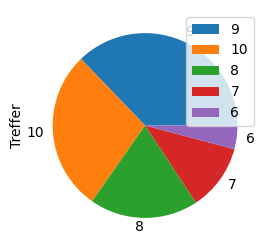

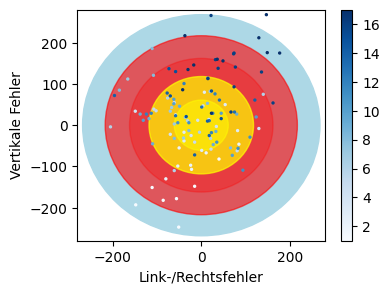

In [178]:
#Vergleich erster Datensatz
Ringe(arrows1)
Zielscheibe(arrows1)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\772131550.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

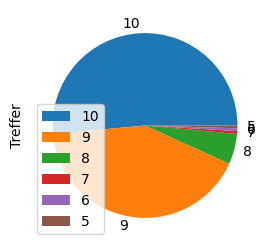

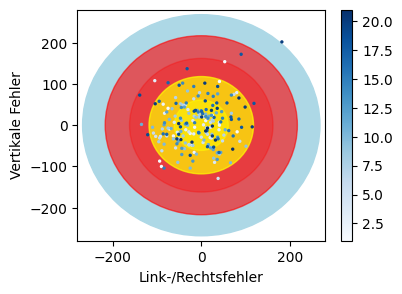

In [179]:
#Vergleich zweiter Datensatz
Ringe(arrows2)
Zielscheibe(arrows2)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\772131550.py:18: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140), zorder = 8)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

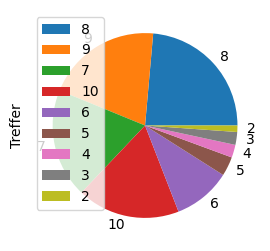

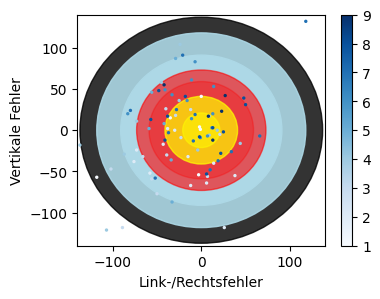

In [180]:
#Vergleich dritter Datensatz
Ringe(arrows3)
Zielscheibe(arrows3)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\772131550.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

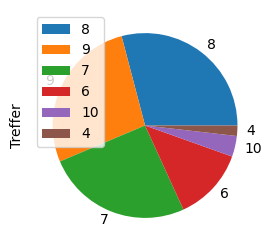

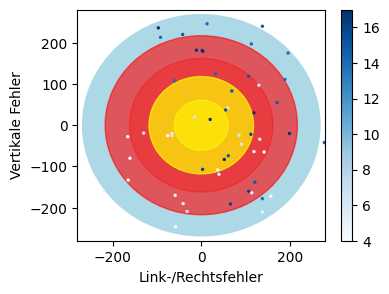

In [181]:
#Vergleich vierter Datensatz
Ringe(arrows4)
Zielscheibe(arrows4)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\3936192681.py:14: RuntimeWarning: invalid value encountered in scalar divide
  average = sum/new["Ringe"].count()


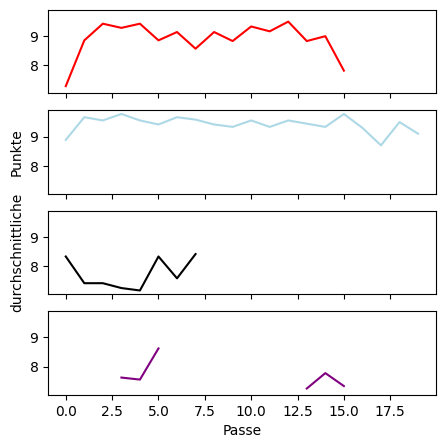

In [182]:
Trefferpassequote(AveragePunkteProPasse(arrows1),AveragePunkteProPasse(arrows2),AveragePunkteProPasse(arrows3),AveragePunkteProPasse(arrows4))

### &#11088; Interaktive Grafik

In [183]:
from ipywidgets import interact
import ipywidgets as widgets

In [184]:
def intgraf(Data, Passe):

    if Data == 1:
        data = Datensatz("arrows1.csv")
    elif Data == 2:
        data = Datensatz("arrows2.csv")
    elif Data == 3:
        data = Datensatz("arrows3.csv")
    else:
        data = Datensatz("arrows4.csv")

    data = data[data["Passe"] == Passe]

    if data["Typ Auflage"].max() == 122:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-280, 280), ylim=(-280, 280), zorder=6)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            plot.add_patch(l)
        
    elif data["Typ Auflage"].max() == 40:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-140, 140), ylim=(-140, 140), zorder=8) 

        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            plot.add_patch(l)
        
    else:
        print("Der Datensatz erhält keine Standardwerte für Typauflage")
    return plot


interact(intgraf, Data=[1, 2, 3, 4], Passe=(1, 17, 1))


interactive(children=(Dropdown(description='Data', options=(1, 2, 3, 4), value=1), IntSlider(value=9, descript…

<function __main__.intgraf(Data, Passe)>

### &#11088; Mittelwert & Standardabweichung

In [185]:
def berechneMittelwerte(Datensatz):
    xsum = 0
    for i in Datensatz["x"]:
        xsum = xsum + i
        xmw = xsum / len(Datensatz["x"])
  
    ysum = 0
    for i in Datensatz["y"]:
         ysum = ysum + i
         ymw = ysum / len(Datensatz["y"])

    return xmw, ymw


In [186]:
def berechneStandardabweichung(Datensatz):
    xstd = Datensatz["x"].std()
    ystd = Datensatz["y"].std()

    return xstd, ystd

In [187]:
import matplotlib.patches as mpatches

def Kennzahlen(Datensatz):
    if Datensatz["Typ Auflage"].max() == 122:
        plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4,3), s=5, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-280, 280), ylim=(-280, 280), zorder=6)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            plot.add_patch(l)
        
        #Mittelwerte berechnen
        xmw, ymw = berechneMittelwerte(Datensatz)
        mwcircle = plt.Circle((xmw, ymw), 5, alpha = 0.9, color='blueviolet', zorder=8, label = "Mittelwerte")
        plot.add_patch(mwcircle)

        plot.axhline(y=ymw, color='blueviolet', linestyle='--', linewidth = 1, zorder = 7)
        plot.axhline
    

        #Standardabweichung berechnen
        xstd, ystd = berechneStandardabweichung(Datensatz)
        stdcircle = plt.Circle((xstd, ystd), 8, alpha = 0.9, color='green', zorder=8, label ="Streuungen")
        plot.add_patch(stdcircle)

        #Legende für Mittelwerte
        handles, labels = plot.get_legend_handles_labels()
        handles.append(mwcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)

        #Legende für Streuung
        handles, labels = plot.get_legend_handles_labels()
        handles.append(stdcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)



    elif Datensatz["Typ Auflage"].max() == 40:
        plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4, 3), s=4, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-140, 140), ylim=(-140, 140), zorder=8) 

        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            plot.add_patch(l)
        
        #Mittelwerte berechnen
        xmw, ymw = berechneMittelwerte(Datensatz)
        mwcircle = plt.Circle((xmw, ymw), 3, alpha = 0.9, color='blueviolet', zorder=8, label = "Mittelwerte")
        plot.add_patch(mwcircle)

        #Standardabweichung berechnen
        xstd, ystd = berechneStandardabweichung(Datensatz)
        stdcircle = plt.Circle((xstd, ystd), 8, alpha = 0.9, color='navy', zorder=8, label ="Streuungen")
        plot.add_patch(stdcircle)

        #Legende für Mittelwerte
        handles, labels = plot.get_legend_handles_labels()
        handles.append(mwcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)

        #Legende für Streuung
        handles, labels = plot.get_legend_handles_labels()
        handles.append(stdcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)
        

    else:
        print("Der Datensatz erhält keine Standardwerte für Typauflage")


    return plot, mwcircle, stdcircle


C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\1683680294.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4,3), s=5, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-280, 280), ylim=(-280, 280), zorder=6)


(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle at 0x27073f5e180>)

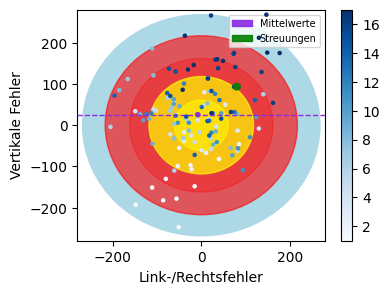

In [188]:
#Mittelwerte und Streuung erster Datensatz
Kennzahlen(arrows1)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\1683680294.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4,3), s=5, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-280, 280), ylim=(-280, 280), zorder=6)


(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle at 0x270741f34d0>)

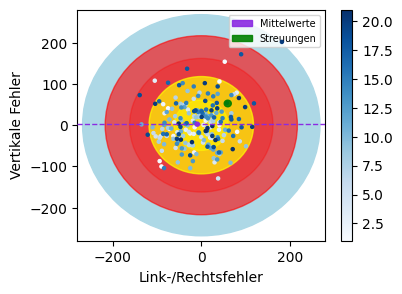

In [189]:
#Mittelwerte und Streuung zweiter Datensatz
Kennzahlen(arrows2)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\1683680294.py:43: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4, 3), s=4, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-140, 140), ylim=(-140, 140), zorder=8)


(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle at 0x27074312960>)

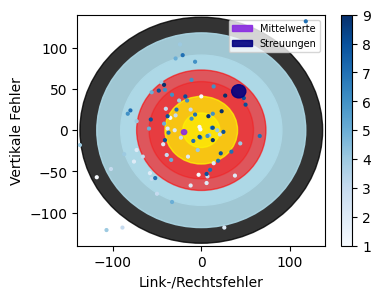

In [190]:
#Mittelwerte und Streuung dritter Datensatz
Kennzahlen(arrows3)

C:\Users\gamer\AppData\Local\Temp\ipykernel_18508\1683680294.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4,3), s=5, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-280, 280), ylim=(-280, 280), zorder=6)


(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle at 0x27074483590>)

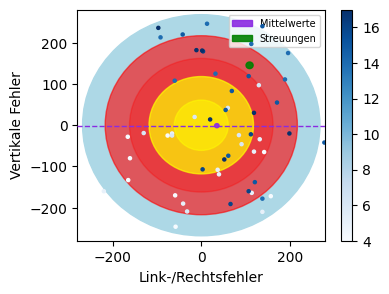

In [191]:
#Mittelwerte und Streuung vierter Datensatz
Kennzahlen(arrows4)

### &#11088; Fehlerellipse

### &#11088; Winkelstreuung